# U.S. Medical Insurance Costs

This project aims to showcase some investgative skills learnt so far (45% complete) through the Data Science Career Path on Codecademyy. It will involve a CSV file which I will analyze to come up with some findings and potitnital use cases for this dataset. (This is a work in progress so may be improved over time with more experience)

From observing the data set, it is structured as follows:
|Name|Type|
|:---|:---|
|age|numerical (int)
|sex|categorical (male/female)
|bmi|numerical (float)
|children|numerical (int)
|smoker|categorical (yes/no)
|region|categorical
|charges|numerical (float)

[comment]: <> (For analysis the data will need to be slightly adjusted to allow for easy processing. "smoker" and "sex" can be changed to a binay category value. 1 = "yes" and "male". )
There doesn't seem to be any missing data.

In [4]:
#import csv into variable
import csv

insurance_data = csv.DictReader(open("insurance.csv"))

#store columns as perameters
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []

for row in insurance_data:
    age.append(int(row['age']))
    sex.append(row['sex'])
    bmi.append(float(row['bmi']))
    children.append(int(row['children']))
    smoker.append(row['smoker'])
    region.append(row['region'])
    charges.append(float(row['charges']))
    

Goals:
- [ ] Descriptive Analysis, (mean, mode, range, count, of each column)
- [ ] Exploratory Analysis, do some investication into correlations between columns



## Descriptive Analysis

I will first do some descriptive analysis to understand the dataset better. Will inlude varius displays of values and charts.

numerical:

- mean - center of the distribution
- standard deviation - sread of the distribution (lower the less variability)
- skewness 
-
- mode - peak of the distribution
-
- median - middle value of data, robust
- interquartile range - robust
-
- range
- variance

categorical:

- frequency - the count
- proprtion - frequency/total
- percentage - proportion converted



### Helper Funcitons

In [50]:
#helper funcitons
import statistics
from scipy import stats
from collections import Counter

#numerical data
def get_mean(data): return sum(data)/len(data)

def get_median(data): return sorted(data)[len(data)//2]

def get_mode(data): return Counter(data).most_common(1)[0][0]

def get_range(data): return abs(max(data) - min(data))

def get_iqr(data): return stats.iqr(data)

def get_stdev(data): return statistics.stdev(data)

def get_variance(data): return statistics.variance(data)
   

In [49]:
#categorical data
def get_frequency(data): return dict(Counter(data))

def get_proportion(frequency): return {key:frequency[key]/sum(frequency.values()) for key in dict(frequency)}

def get_percentage(proportion): return {key: proportion[key]*100 for key in proportion}

                                                                                      

In [53]:
def get_numerical_variable_info(data):
    variable_info = {
        "mean":get_mean(data),
        "median":get_median(data),
        "mode":get_mode(data),
        "range":get_range(data),
        "iqr":get_iqr(data),
        "stdev":get_stdev(data),
        "variance":get_variance(data),
        "max":max(data),
        "min":min(data)
    }
    return variable_info

In [54]:
def get_categorical_variable_info(data):
    variable_info = {
        "frequency" : get_frequency(data)
    }
    variable_info["proportion"] = get_proportion(variable_info['frequency'])
    variable_info["percentage"] = get_percentage(variable_info['proportion'])
    return variable_info

In [55]:
def create_numeric_plots(data):
    import matplotlib.pyplot as plt
    #to fix errors when making labels
    from importlib import reload
    variable_info = get_numerical_variable_info(data)
    print(variable_info)
    
    plt=reload(plt)

    fig, ax = plt.subplots(2,1)
    fig.tight_layout()


    bg_color = [1,1,1,0.5]

    #distribution analysis histogram
    bin_num = round(variable_info['range'])/2 if len(data) < 50 else 50
    ax[0].hist(data, bins=bin_num,color='c', edgecolor='k')
    ax[0].axvline(variable_info['mean'], color='k', linestyle='dashed')
    ax[0].text(variable_info['mean'] + 0.6, 0, f'mean: {round(variable_info["mean"])}', rotation=90, va='bottom', backgroundcolor=bg_color)
    ax[0].axvline(variable_info['mode'], color='k', linestyle='dashed')
    ax[0].text(variable_info['mode'] + 0.6, 0, f'mode: {round(variable_info["mode"])}', rotation=90, va='bottom', backgroundcolor=bg_color)
    ax[0].axvline(variable_info['median'], color='k', linestyle='dashed')
    ax[0].text(variable_info['median'] - 1.6, 0, f'median: {round(variable_info["median"])}', rotation=90, va='bottom', backgroundcolor=bg_color)

    #outlier analysis box plot
    ax[1].boxplot(data, vert= 0, widths=0.5)
    ax[1].text(variable_info['median'] + 0.5, 1.3, f'iqr: {round(variable_info["iqr"])}', va='center', ha='center')
    ax[1].text(variable_info['max'], 1, f'max: {round(variable_info["max"])}', va='center', ha='center', rotation=90,backgroundcolor=bg_color)
    ax[1].text(variable_info['min'], 1, f'min: {round(variable_info["min"])}', va='center', ha='center', rotation=90,backgroundcolor=bg_color)

    plt.show()


### Age

{'mean': 39.20702541106129, 'median': 39, 'mode': 18, 'range': 46, 'iqr': 24.0, 'stdev': 14.049960379216156, 'variance': 197.40138665754378, 'max': 64, 'min': 18}


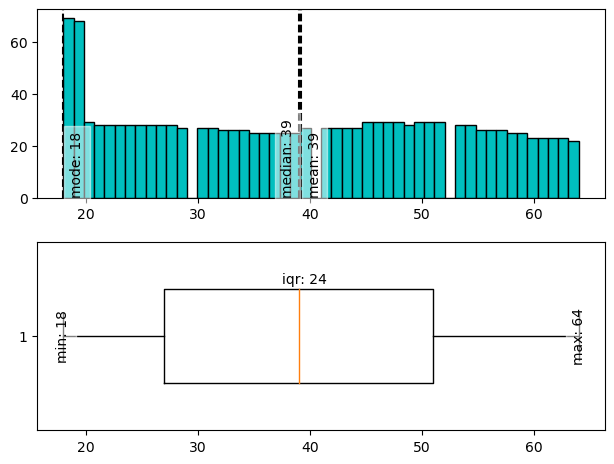

In [56]:
create_numeric_plots(age)

these graphs show that the spread of the data is quite even across the age groups, with a spike at age 18. understanding if this is a good sample of ages needs investigation to find if this has a similar spread to the spread of the ages of total population of the US.
<br>
<img src="images/us_age_populaition.png" width="400" height="auto" />
<br>
As we can see, there is more of a curve within the general population (as of 2022), with a peak around 30-34. This also shows the total population, not just those with medical insurance. So this dataset may not be proportionally representitative of all age groups. 

### BMI

[(32.3, 13), (28.31, 9), (28.88, 8), (34.1, 8), (30.8, 8), (30.875, 8), (31.35, 8), (30.495, 8), (32.775, 7), (35.2, 7)]
{'mean': 30.663396860986538, 'median': 30.4, 'mode': 32.3, 'range': 37.17, 'iqr': 8.3975, 'stdev': 6.098186911679014, 'variance': 37.18788360977324, 'max': 53.13, 'min': 15.96}


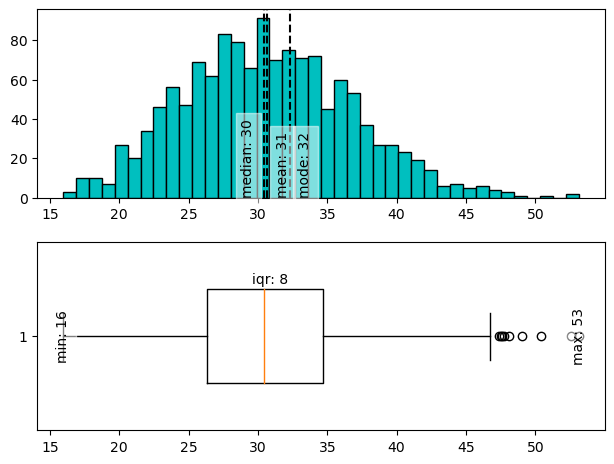

In [17]:
create_numeric_plots(bmi)

These plots show that within this dataset, the average bmi is 31. For adults 20 years or older, the bmi chart is as follows:
|BMI|Weight Status|
|:---|:---|
|Below 18.5|Underweight|
|18.5 – 24.9|Healthy Weight|
|25.0 – 29.9|Overweight|
|30.0 and Above|Obesity|

The data that we have does include ages below 20, but a general observation is that the trend in this dataset is that, with a median of 30, over half of the observations are included in the "Obecity" weight status. with the majority of poeple between 25 and 35, which is another observation showing the above healthy weight trend.

### Age

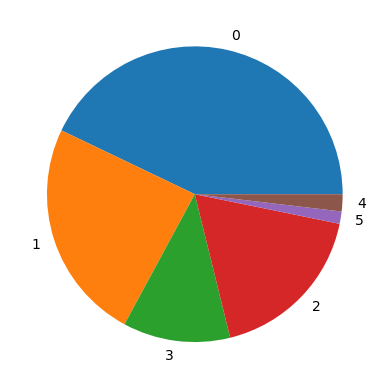

In [58]:
children_info=get_categorical_variable_info(children)
children_info

import matplotlib.pyplot as plt
import numpy as np

plt.pie(children_info['percentage'].values(), labels = children_info['percentage'].keys())
plt.show()


[(1639.5631, 2), (16884.924, 1), (1725.5523, 1), (4449.462, 1), (21984.47061, 1), (3866.8552, 1), (3756.6216, 1), (8240.5896, 1), (7281.5056, 1), (6406.4107, 1)]
{'mean': 13270.422265141257, 'median': 9386.1613, 'mode': 1639.5631, 'range': 62648.554110000005, 'iqr': 11899.625365, 'stdev': 12110.011236694001, 'variance': 146652372.15285498, 'max': 63770.42801, 'min': 1121.8739}


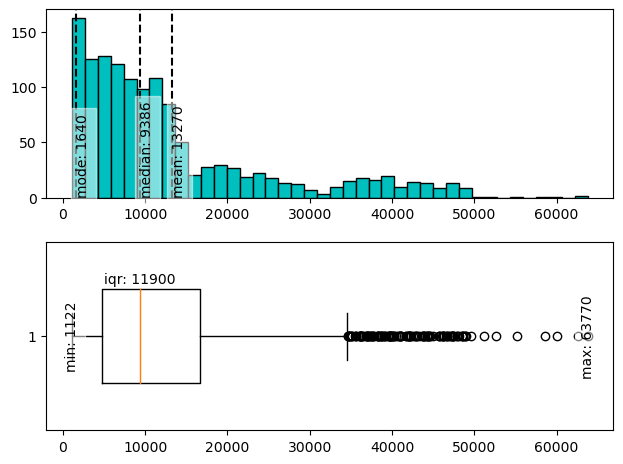

In [19]:
create_numeric_plots(charges)